In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle5 as pickle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install pickle5

In [62]:
path=r'/content/drive/MyDrive'
df=pickle.load(open(f"{path}/ml_project_dataset.pkl", "rb"))

In [63]:
Data=df.values

In [64]:
#Arranging Status label
print(np.unique(Data[ :,2]))
status = Data[ : ,2]
indices_S = [i for i, x in enumerate(status) if x == 'sad' or x =='S' ]
indices_H = [i for i, x in enumerate(status) if x == 'H' or x =='happy' or x == 'happy ' ]
indices_N = [i for i, x in enumerate(status) if x == 'N' or x =='Normal' or x =='natural'  or x=='neutral']

for i in (indices_S): status[i] = 'Sad'
for i in (indices_H): status[i] = 'Happy'
for i in (indices_N): status[i] = 'Neutral'

indices_fake =[i for i, x in enumerate(status) if x != 'Sad' and x !='Happy' and x!= 'Neutral' ]
print(indices_fake)
Data[ : , 2] = status

['0040a40fde' '0041a40fde' '0042a40fde' '0043a40fde' '0044a40fde'
 '0045a40fde' '0046a40fde' '0047a40fde' '0048a40fde' '0049a40fde'
 '0050a40fde' '0051a40fde' '0052a40fde' '0053a40fde' '0054a40fde'
 '0d02ffb6f1' '0d02ffb6f10' '0d02ffb6f11' '0d02ffb6f12' '0d02ffb6f13'
 '0d02ffb6f14' '0d02ffb6f15' '0d02ffb6f2' '0d02ffb6f3' '0d02ffb6f4'
 '0d02ffb6f5' '0d02ffb6f6' '0d02ffb6f7' '0d02ffb6f8' '0d02ffb6f9'
 '597e0ee7bf' '598e0ee7bf' '599e0ee7bf' '600e0ee7bf' '601e0ee7bf'
 '602e0ee7bf' '603e0ee7bf' '604e0ee7bf' '605e0ee7bf' '606e0ee7bf'
 '607e0ee7bf' '608e0ee7bf' '609e0ee7bf' '610e0ee7bf' '611e0ee7bf'
 '77ae9e7a38' '77ae9e7a39' '77ae9e7a40' '77ae9e7a41' '77ae9e7a42'
 '77ae9e7a43' '77ae9e7a44' '77ae9e7a45' '77ae9e7a46' '77ae9e7a47'
 '77ae9e7a48' '77ae9e7a49' '77ae9e7a50' '77ae9e7a51' '77ae9e7a52' 'H'
 'Happy' 'N' 'Neutral' 'Normal' 'S' 'Sad' 'happy' 'happy ' 'natural'
 'neutral' 'sad']
[18, 75, 126, 137, 148, 154, 185, 186, 209, 244, 254, 297, 327, 351, 355, 378, 380, 427, 452, 495, 562, 593, 62

In [65]:
#Removing fake datas
Data = [Data[x , : ] for x in range(len(Data[: , 0])) if x not in (indices_fake)]
Data = np.array(Data)

In [66]:
#check biasing 
num_H = len( [i for i, x in enumerate(Data[ : , 2]) if x == 'Happy'])
num_N = len( [i for i, x in enumerate(Data[ : , 2]) if x == 'Neutral'])
num_S = len( [i for i, x in enumerate(Data[ : , 2]) if x == 'Sad'])
print(num_H , num_N , num_S) # No need for upsampling


846 851 848


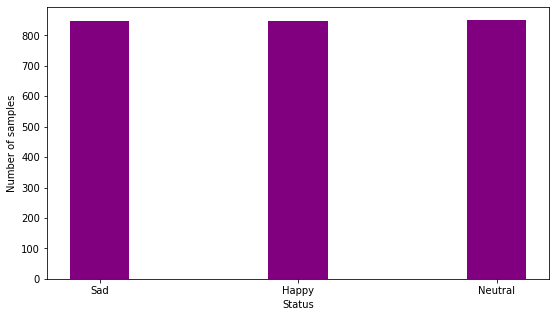

In [67]:
dataS = {'Sad':num_S, 'Happy':num_H , 'Neutral':num_N}
Status = list(dataS.keys())
valuesS = list(dataS.values())
  
fig = plt.figure(figsize = (9, 5))

plt.bar(Status, valuesS, color ='purple',width = 0.3)
 
plt.xlabel("Status")
plt.ylabel("Number of samples")
plt.show()

In [68]:
#Remove NANs
f1 = list(Data[ : , 3])
f2 = list(Data[ : , 4])
f3 = list(Data[ : , 5])
f4 = list(Data[ : , 6])
f5 = list(Data[ : , 7])

f1= np.array(f1)
f2= np.array(f2)
f3= np.array(f3)
f4= np.array(f4)
f5= np.array(f5)

nan_f1 = np.argwhere(np.isnan(f1))
nan_f2 = np.argwhere(np.isnan(f2))
nan_f3 = np.argwhere(np.isnan(f3))
nan_f4 = np.argwhere(np.isnan(f4))
nan_f5 = np.argwhere(np.isnan(f5))

In [69]:
col_meanf1 = np.nanmean(f1 , axis = 0)
col_meanf2 = np.nanmean(f2 , axis = 0)
col_meanf3 = np.nanmean(f3 , axis = 0)
col_meanf4 = np.nanmean(f4 , axis = 0)
col_meanf5 = np.nanmean(f5 , axis = 0)

inds1 = np.where(np.isnan(f1))
f1[inds1] = np.take(col_meanf1 , inds1[1])
inds2 = np.where(np.isnan(f2))
f2[inds2] = np.take(col_meanf2 , inds2[1])
inds3 = np.where(np.isnan(f3))
f3[inds3] = np.take(col_meanf3 , inds3[1])
inds4 = np.where(np.isnan(f4))
f4[inds4] = np.take(col_meanf4 , inds4[1])
inds5 = np.where(np.isnan(f5))
f5[inds5] = np.take(col_meanf5 , inds5[1])

nan_f1 = np.argwhere(np.isnan(f1))
nan_f2 = np.argwhere(np.isnan(f2))
nan_f3 = np.argwhere(np.isnan(f3))
nan_f4 = np.argwhere(np.isnan(f4))
nan_f5 = np.argwhere(np.isnan(f5))

print(nan_f1 , nan_f2 , nan_f3 , nan_f4 , nan_f5) #All checked     # Need to be more clean 

[] [] [] [] []


# Choose The Data

In [70]:
x_f1=f1.copy()
x_f2=f2.copy()
x_f3=f3.copy()
x_f4=f4.copy()
x_f5=f5.copy()

y_S = Data[:,2].copy()   

In [71]:
np.unique(y_S,return_counts=True)

(array(['Happy', 'Neutral', 'Sad'], dtype=object), array([846, 851, 848]))

In [72]:
from sklearn.model_selection import train_test_split
# split the dataset into train and test for f1
xtrain_f1, xtest_f1, ytrain_f1, ytest_f1 = train_test_split(x_f1, y_S, test_size=0.2, random_state=40)

# split the dataset into train and test for f2
xtrain_f2, xtest_f2, ytrain_f2, ytest_f2 = train_test_split(x_f2, y_S, test_size=0.2, random_state=40)

# split the dataset into train and test for f3
xtrain_f3, xtest_f3, ytrain_f3, ytest_f3 = train_test_split(x_f3, y_S, test_size=0.2, random_state=40)

# split the dataset into train and test for f4
xtrain_f4, xtest_f4, ytrain_f4, ytest_f4 = train_test_split(x_f4, y_S, test_size=0.2, random_state=40)

# split the dataset into train and test for f5
xtrain_f5, xtest_f5, ytrain_f5, ytest_f5 = train_test_split(x_f5, y_S, test_size=0.2, random_state=40)

In [73]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

xtrain_f1 = sc.fit_transform(xtrain_f1)
xtest_f1 = sc.transform(xtest_f1)

xtrain_f2 = sc.fit_transform(xtrain_f2)
xtest_f2 = sc.transform(xtest_f2)

xtrain_f3 = sc.fit_transform(xtrain_f3)
xtest_f3 = sc.transform(xtest_f3)

xtrain_f4 = sc.fit_transform(xtrain_f4)
xtest_f4 = sc.transform(xtest_f4)

xtrain_f5 = sc.fit_transform(xtrain_f5)
xtest_f5 = sc.transform(xtest_f5)

# LDA

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [75]:
lda = LinearDiscriminantAnalysis(n_components=1)

xtrain_f1 = lda.fit(xtrain_f1, ytrain_f1).transform(xtrain_f1)
xtest_f1=lda.transform(xtest_f1)

xtrain_f2 = lda.fit(xtrain_f2, ytrain_f2).transform(xtrain_f2)
xtest_f2=lda.transform(xtest_f2)

xtrain_f3 = lda.fit(xtrain_f3, ytrain_f3).transform(xtrain_f3)
xtest_f3=lda.transform(xtest_f3)

xtrain_f4 = lda.fit(xtrain_f4, ytrain_f4).transform(xtrain_f4)
xtest_f4=lda.transform(xtest_f4)

xtrain_f5 = lda.fit(xtrain_f5, ytrain_f5).transform(xtrain_f5)
xtest_f5=lda.transform(xtest_f5)

In [76]:
class_names=['Happy','Neutral','Sad']

# All Classifiers

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB   

In [78]:
classifiers=[]
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 =make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
classifiers.append(model3)
model4 = tree.DecisionTreeClassifier()
classifiers.append(model4)
model5 = RandomForestClassifier()
classifiers.append(model5)
model6 = GaussianNB()
classifiers.append(model6)

In [79]:
accuracy_f1=[]
for clf in classifiers:
    clf.fit(xtrain_f1, ytrain_f1)
    ypred_f1= clf.predict(xtest_f1)
    acc = accuracy_score(ytest_f1, ypred_f1)
    accuracy_f1.append(acc)

print("Accuracy of GradientBoostingClassifier for F1 : ",accuracy_f1[0])
print("Accuracy of SVC for F1 : ",accuracy_f1[1])
print("Accuracy of Pipeline for F1 : ",accuracy_f1[2])
print("Accuracy of DecisionTreeClassifier for F1 : ",accuracy_f1[3])
print("Accuracy of RandomForestClassifier for F1 : ",accuracy_f1[4])
print("Accuracy of GaussianNB for F1 : ",accuracy_f1[5])


Accuracy of GradientBoostingClassifier for F1 :  0.5383104125736738
Accuracy of SVC for F1 :  0.5442043222003929
Accuracy of Pipeline for F1 :  0.5442043222003929
Accuracy of DecisionTreeClassifier for F1 :  0.5088408644400786
Accuracy of RandomForestClassifier for F1 :  0.5068762278978389
Accuracy of GaussianNB for F1 :  0.5422396856581533


In [80]:
accuracy_f2=[]
for clf in classifiers:      #####   f2
    clf.fit(xtrain_f2, ytrain_f2)
    ypred_f2= clf.predict(xtest_f2)
    acc = accuracy_score(ytest_f2, ypred_f2)
    accuracy_f2.append(acc)

print("Accuracy of GradientBoostingClassifier for F2 : ",accuracy_f2[0])
print("Accuracy of SVC for F2 : ",accuracy_f2[1])
print("Accuracy of Pipeline for F2 : ",accuracy_f2[2])
print("Accuracy of DecisionTreeClassifier for F2 : ",accuracy_f2[3])
print("Accuracy of RandomForestClassifier for F2 : ",accuracy_f2[4])
print("Accuracy of GaussianNB for F2 : ",accuracy_f2[5])

Accuracy of GradientBoostingClassifier for F2 :  0.3929273084479371
Accuracy of SVC for F2 :  0.38703339882121807
Accuracy of Pipeline for F2 :  0.38703339882121807
Accuracy of DecisionTreeClassifier for F2 :  0.3988212180746562
Accuracy of RandomForestClassifier for F2 :  0.3968565815324165
Accuracy of GaussianNB for F2 :  0.39096267190569745


In [81]:
accuracy_f3=[]
for clf in classifiers:     #####  f3
    clf.fit(xtrain_f3, ytrain_f3)
    ypred_f3= clf.predict(xtest_f3)
    acc = accuracy_score(ytest_f3, ypred_f3)
    accuracy_f3.append(acc)


print("Accuracy of GradientBoostingClassifier for F3 : ",accuracy_f3[0])
print("Accuracy of SVC for F3 : ",accuracy_f3[1])
print("Accuracy of Pipeline for F3 : ",accuracy_f3[2])
print("Accuracy of DecisionTreeClassifier for F3 : ",accuracy_f3[3])
print("Accuracy of RandomForestClassifier for F3 : ",accuracy_f3[4])
print("Accuracy of GaussianNB for F3 : ",accuracy_f3[5])

Accuracy of GradientBoostingClassifier for F3 :  0.4263261296660118
Accuracy of SVC for F3 :  0.4027504911591356
Accuracy of Pipeline for F3 :  0.4027504911591356
Accuracy of DecisionTreeClassifier for F3 :  0.4518664047151277
Accuracy of RandomForestClassifier for F3 :  0.4361493123772102
Accuracy of GaussianNB for F3 :  0.4302554027504912


In [82]:
accuracy_f4=[]
for clf in classifiers:    #####  f4
    clf.fit(xtrain_f4, ytrain_f4)
    ypred_f4= clf.predict(xtest_f4)
    acc = accuracy_score(ytest_f4, ypred_f4)
    accuracy_f4.append(acc)

print("Accuracy of GradientBoostingClassifier for F4 : ",accuracy_f4[0])
print("Accuracy of SVC for F4 : ",accuracy_f4[1])
print("Accuracy of Pipeline for F4 : ",accuracy_f4[2])
print("Accuracy of DecisionTreeClassifier for F4 : ",accuracy_f4[3])
print("Accuracy of RandomForestClassifier for F4 : ",accuracy_f4[4])
print("Accuracy of GaussianNB for F4 : ",accuracy_f4[5])

Accuracy of GradientBoostingClassifier for F4 :  0.34577603143418467
Accuracy of SVC for F4 :  0.3477406679764244
Accuracy of Pipeline for F4 :  0.3477406679764244
Accuracy of DecisionTreeClassifier for F4 :  0.3575638506876228
Accuracy of RandomForestClassifier for F4 :  0.3555992141453831
Accuracy of GaussianNB for F4 :  0.3654223968565815


In [83]:
accuracy_f5=[]
for clf in classifiers:   ##### f5
    clf.fit(xtrain_f5, ytrain_f5)
    ypred_f5= clf.predict(xtest_f5)
    acc = accuracy_score(ytest_f5, ypred_f5)
    accuracy_f5.append(acc)

print("Accuracy of GradientBoostingClassifier for F5 : ",accuracy_f5[0])
print("Accuracy of SVC for F5 : ",accuracy_f5[1])
print("Accuracy of Pipeline for F5 : ",accuracy_f5[2])
print("Accuracy of DecisionTreeClassifier for F5 : ",accuracy_f5[3])
print("Accuracy of RandomForestClassifier for F5 : ",accuracy_f5[4])
print("Accuracy of GaussianNB for F5 : ",accuracy_f5[5])

Accuracy of GradientBoostingClassifier for F5 :  0.41453831041257366
Accuracy of SVC for F5 :  0.42829076620825146
Accuracy of Pipeline for F5 :  0.42829076620825146
Accuracy of DecisionTreeClassifier for F5 :  0.37721021611001965
Accuracy of RandomForestClassifier for F5 :  0.37328094302554027
Accuracy of GaussianNB for F5 :  0.4243614931237721


In [85]:
from statistics import mean
Status_score = []
Status_score.append(mean(accuracy_f1))
Status_score.append(mean(accuracy_f2))
Status_score.append(mean(accuracy_f3))
Status_score.append(mean(accuracy_f4))
Status_score.append(mean(accuracy_f5))


In [86]:
Status_score

[0.5307793058284218,
 0.3922724296005239,
 0.42501637197118536,
 0.3533071381794368,
 0.4076620825147348]

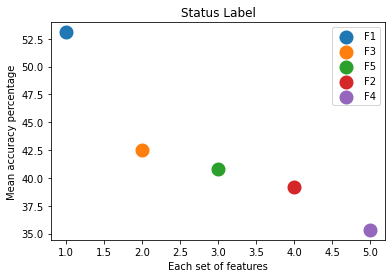

In [87]:
plt.scatter( 1 , Status_score[0]*100 , label="F1",linewidth=8)
plt.scatter( 2 , Status_score[2]*100 , label="F3",linewidth=8)
plt.scatter( 3 , Status_score[4]*100 , label="F5",linewidth=8)
plt.scatter( 4 , Status_score[1]*100 , label="F2",linewidth=8)
plt.scatter( 5 , Status_score[3]*100 , label="F4",linewidth=8)
plt.ylabel("Mean accuracy percentage")
plt.xlabel("Each set of features")
plt.title("Status Label")
plt.legend()
plt.show()

***Design the Classifier***

In [88]:
FirstModel = GaussianNB()
FirstModel.fit(xtrain_f1, ytrain_f1)
ypred_f1= FirstModel.predict(xtest_f1)
acc = accuracy_score(ytest_f1, ypred_f1)

In [89]:
print("Accuracy of First Classifier  is : %0.2f"%(acc*100) )

Accuracy of First Classifier  is : 54.22


              precision    recall  f1-score   support

       Happy       0.71      0.60      0.65       168
     Neutral       0.44      0.49      0.46       175
         Sad       0.52      0.54      0.53       166

    accuracy                           0.54       509
   macro avg       0.56      0.54      0.55       509
weighted avg       0.56      0.54      0.55       509



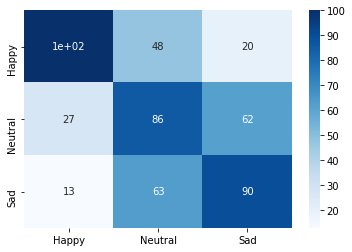

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(ytest_f1, FirstModel.predict(xtest_f1),target_names=class_names)) 
cf_matrix=confusion_matrix(ytest_f1, FirstModel.predict(xtest_f1))
import seaborn as sns
x_axis_labels = class_names 
y_axis_labels = class_names 
sns.heatmap(cf_matrix, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='Blues')